# Introduction

_Abdurrahman Dilmac_

12nd February 2022

## Unsupervised vs Supervised

Simply; on supervised learning, data has labels and pre-defined classes whereas on unsupervised learning, we data don't have them.

<figure>
    <img src="img/unsupervised_supervised.jpeg">
    <figcaption>Unsupervised vs Supervised Learning<br> (Figure from: <i>https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d</i>)</figcaption>
</figure>

## Regression vs Classification

<figure>
    <img src="img/regression_classification.webp">
    <figcaption>Regression vs Classification<br> (Figure from: <i>https://www.sharpsightlabs.com/blog/regression-vs-classification/</i>)</figcaption>
</figure>


## Generative vs Discriminative

<figure>
    <img src="img/generative_discriminative.png">
    <figcaption>Generative vs Discriminative Models<br> (Figure from: <i>https://stanford.edu/%7Eshervine/teaching/cs-229/cheatsheet-supervised-learning</i>)</figcaption>
</figure>



Generative models include:

- Naive Bayes
- Hidden Markov Models (HMM)
- Gaussian Mixture Models (GMM)

Discriminative models include:

- (Deep) Neural Networks
- Support Vector Machines (SVM)
- Logistic Regression

## Metrics

<figure>
    <img src="img/precision_recall.png">
    <figcaption>Precision, recall, accuracy. <br> (Figure from: <i>https://towardsdatascience.com/precision-vs-recall-386cf9f89488</i>)</figcaption>
</figure>

Let's demonstrate a quick example.

In [1]:
# Setup and imports

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline
plt.rcParams["figure.figsize"] = (27, 27)

## Clustering

Clustering is grouping given data such that more similar items are put into the same group than others. The difference between classification (of supervised learning) and clustering is that in clustering, no labels exist. Instead, data points are clustered based on their similarities.

For unsupervised learning, the number of clusters is pre-defined, and usually denoted by `K`. Note that each datum belongs to only one cluster and clusters never overlaps.

<figure>
    <img src="img/comparison_of_clustering.png">
    <figcaption>Visualisation of comparison of clustering algorithms. <br> (Figure from: <i>https://scikit-learn.org/stable/modules/clustering.html</i>)</figcaption>
</figure>

We will demonstrate two clustering applications:

1. K-Means Clustering
2. Hierarchical Clustering 

### 1. K-Means Clustering

_(Do not confuse K-Means and K-Nearest Neighbours (of supervised learning).)_

<figure>
    <img src="img/kmeans_iterations.png" width="600">
    <figcaption>Iterations of K-Means <br><i>(James, Gareth, et al. An introduction to statistical learning. Vol. 112. New York: springer, 2013.)</i></figcaption>
</figure>


We initialize a pre-defined fixed number of `k` clusters. Then by using a distance metric, we assign each sample to one of the clusters. Each cluster has a mean value of its samples. It scales well with high number of samples and not-too-many clusters.

<img src="img/kmeans_algorithm.png" width="600">

An interesting application is that we can cluster all the colors of an image into a limited number of colors. In that way, we achieve a compressed image and a posterized view. Let's demonstrate it.

In [2]:
from sklearn.cluster import KMeans

In [3]:
def quantize_image_with_kmeans(img_path, n_clusters):
    orig_img = np.array(Image.open(img_path))
    h, w, c, = orig_img.shape
    img = np.reshape(orig_img, (h*w, c))

    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(img)
    
    # print(labels.shape)
    # print(kmeans.cluster_centers_.astype('uint8'))
    quantized_img = kmeans.cluster_centers_.astype('uint8')[labels]
    quantized_img = np.reshape(quantized_img, (h, w, c))

    plt.figure(1)
    plt.subplot(121)
    plt.imshow(orig_img)
    plt.subplot(122)
    plt.imshow(quantized_img)
    plt.show()

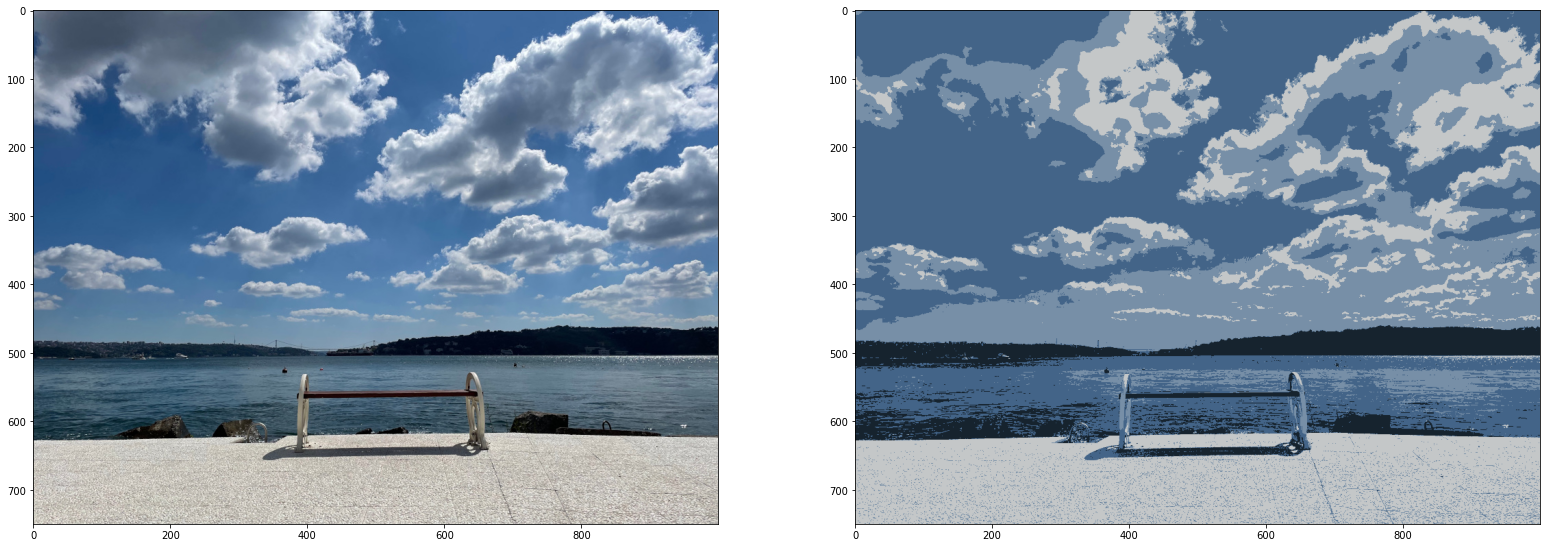

In [4]:
quantize_image_with_kmeans('img/inzva_kundura_view.jpg', 4)